# Sigmoid Neuron Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors

The sigmoid function is given as - 
$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

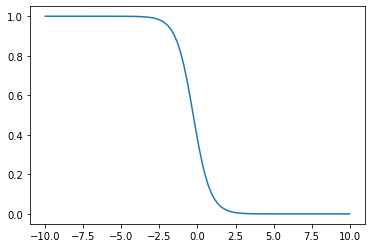

In [4]:
w = -1.8
b = -0.5  
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

The above was sigmoid function for one variable $x$. For more than one variable the sigmoid function is -
$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

# Creating a mesh grid 
XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [8]:
# Taking some dummy values to plot the sigmoid_2d function
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [9]:
# For Customised Color pattern
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

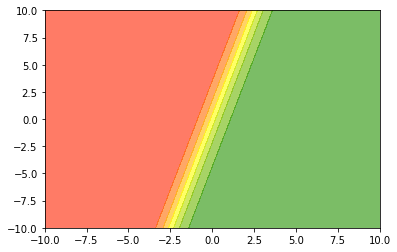

In [10]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

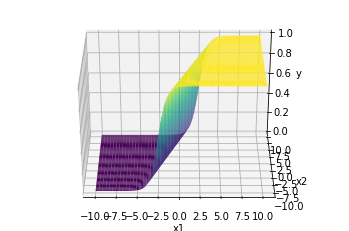

In [11]:
# 3D figure 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

As we have seen how the sigmoid function looks like graphically. Now let's proceed to the calculation of loss function and it's plotting.

# Compute Loss for a Given Dataset

In [12]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

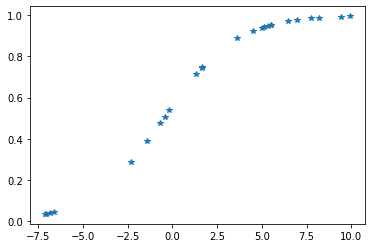

In [13]:
plt.plot(X, Y, '*')
plt.show()

In [14]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [15]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [16]:
WW.shape

(101, 101)

In [17]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

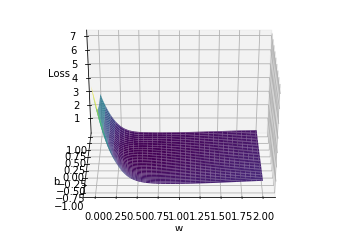

In [18]:
# Plotting the loss function

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [30]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [31]:
print(i, j)

63 25


In [32]:
print(WW[i, j], BB[i, j])

0.5 0.26


The above method was guessing the values of the $w$ and $b$ and then trying to minimise the loss function.
This method is time consuming and hence not a good one.
This method just shows how the minima of the curve of the loss function gives the optimal solution.
We will now look at the more controlled and directional version of finding the minima at the loss function surface.

# Class for Sigmoid Neuron

Let's create the class for Sigmoid Neuron

In [33]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
        
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
    
        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

Let's test our class on Some TOY Data

# Fit for toy data

In [34]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [35]:
sn = SigmoidNeuron()

In [38]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1 , XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

[[0.18025789 0.52470808]] [0.00204407]
[[0.65307276 0.09915349]] [0.02152967]
[[ 0.71140464 -0.41021828]] [-0.00358484]
[[ 0.93086534 -0.15123901]] [-0.05187843]
[[ 0.93673502 -0.44909886]] [-0.11523437]
[[ 1.0957326  -0.25208001]] [-0.16124945]
[[ 1.10352535 -0.45025097]] [-0.21574963]
[[ 1.2071841  -0.34351525]] [-0.25485414]
[[ 1.23131511 -0.43923678]] [-0.29654052]
[[ 1.29305517 -0.41045739]] [-0.32969961]
[[ 1.32814574 -0.44417493]] [-0.36226684]
[[ 1.36982579 -0.44887856]] [-0.39118992]
[[ 1.40508914 -0.46300543]] [-0.4183931]
[[ 1.43904403 -0.47327114]] [-0.44357908]
[[ 1.47062159 -0.48359051]] [-0.46712686]
[[ 1.5003693  -0.49317109]] [-0.48918039]
[[ 1.52843477 -0.5022282 ]] [-0.50990267]
[[ 1.55499583 -0.51079867]] [-0.52942758]
[[ 1.58019888 -0.51893136]] [-0.54787187]
[[ 1.60417081 -0.52666721]] [-0.56533709]
[[ 1.62702193 -0.53404185]] [-0.58191202]
[[ 1.6488487  -0.54108643]] [-0.59767461]
[[ 1.66973588 -0.5478283 ]] [-0.61269358]
[[ 1.68975838 -0.55429166]] [-0.62702976]

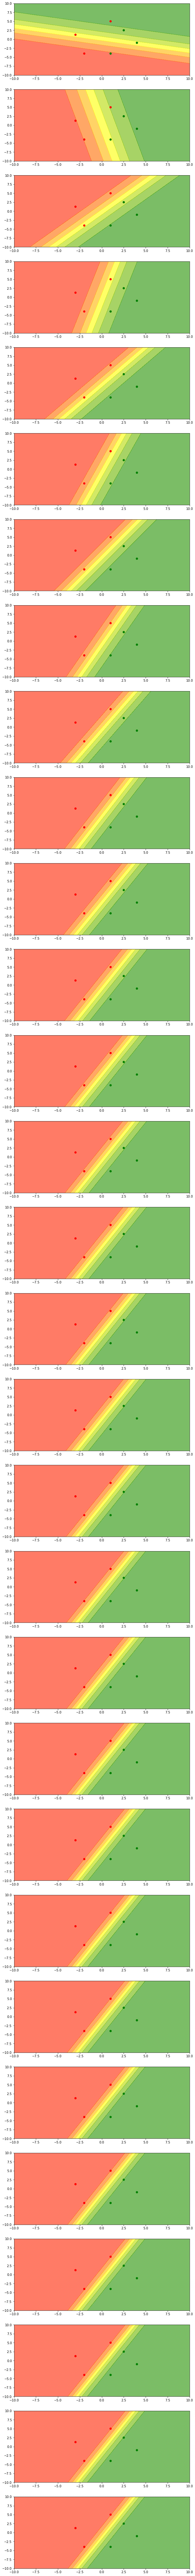

In [40]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.5, False)

In [41]:
%matplotlib inline

In [42]:
from matplotlib import animation, rc
from IPython.display import HTML

ValueError: x and y can be no greater than 2-D, but have shapes (1, 6, 2) and (1, 6)

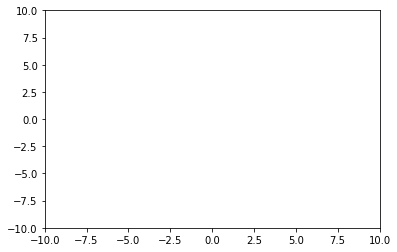

In [53]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 10))

line, = ax.plot([X], [Y], lw=2)

In [50]:
# initialization function: plot the background of each frame
def init():
    line.set_data([X], [Y])
    return (line,)

In [51]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [52]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [49]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available